# Project Goal
> ## Find Drivers of Heart Disease or Attack

# Initial Hypothesis
> ## I believe that Diabetes and Smoking will be the best predictors on whether or not someone will have a heart attack

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Acquire
- Data acuired from Kaggle
- https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
- Each row represents a unique patient and their individual data


In [2]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# Prepare 

- There are 253680 rows and 11 columns
- View/correct datatypes
- changed age from integers to correct age bins
- There were no null values
- Visualize full dataset for univariate exploration (histograms and boxplots)
    - Handle outliers
- I got rid of the outliers in BMI by getting rid of the top 1 percent
- verified datatypes
- made all of the column names lower case
- split the data on the target variable heart disease or attack

In [3]:
df = wrangle.prepare_data(df)
second_list, the_age, the_list, target = wrangle.get_second_list(df)
train, validate, test = wrangle.split_data(df, 'heartdiseaseorattack')
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test, cols = second_list)

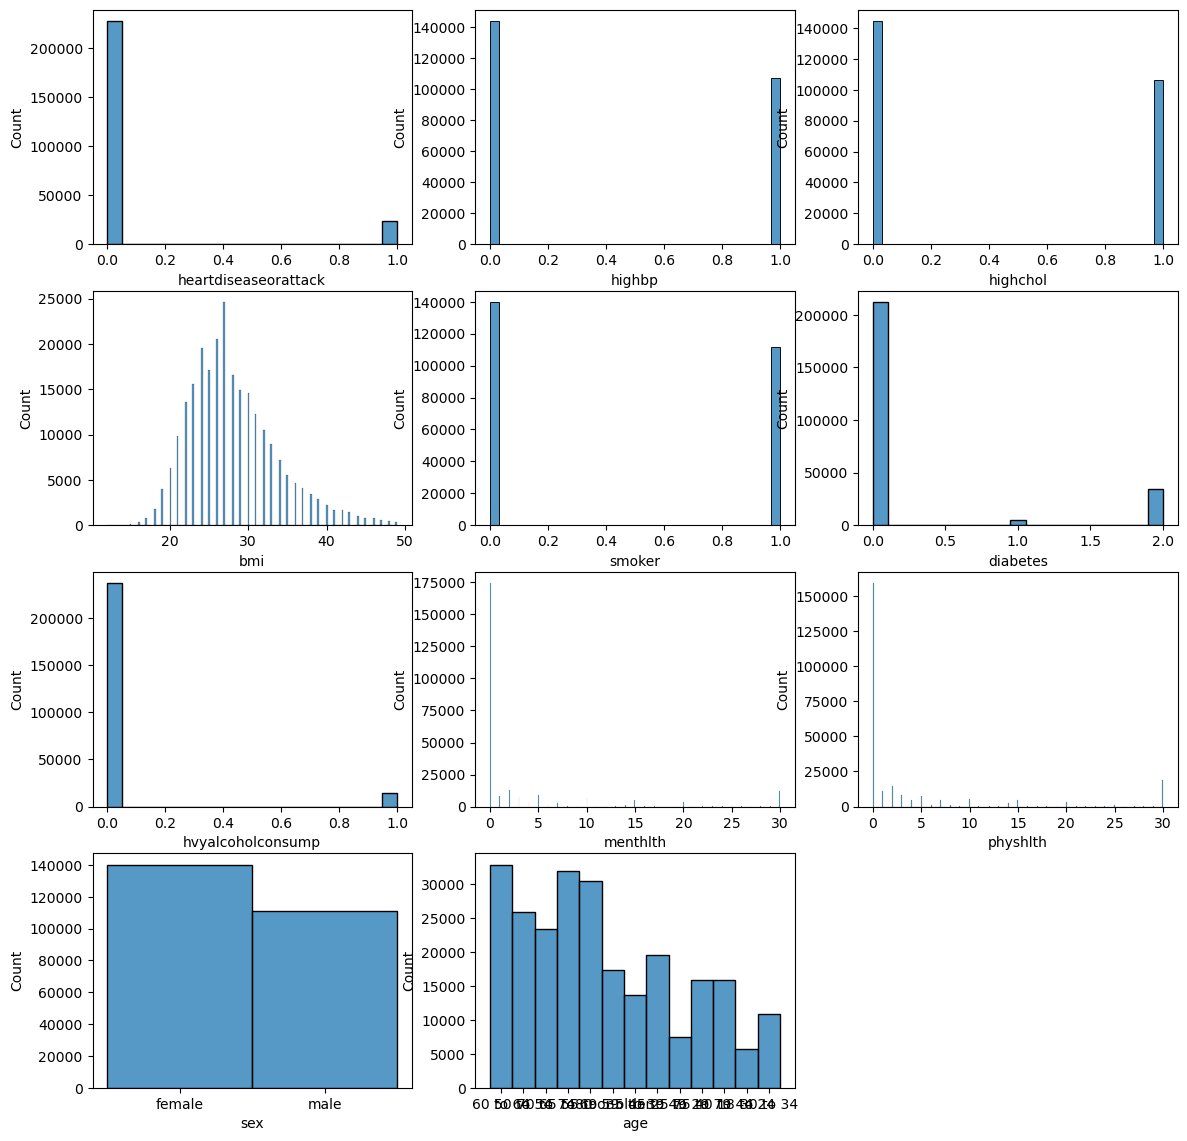

In [4]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
for i, col in enumerate(df):
    plt.subplot(4,3,i+1)
  
    sns.histplot(df[col])
    
plt.show()

# Bivariate Exploration

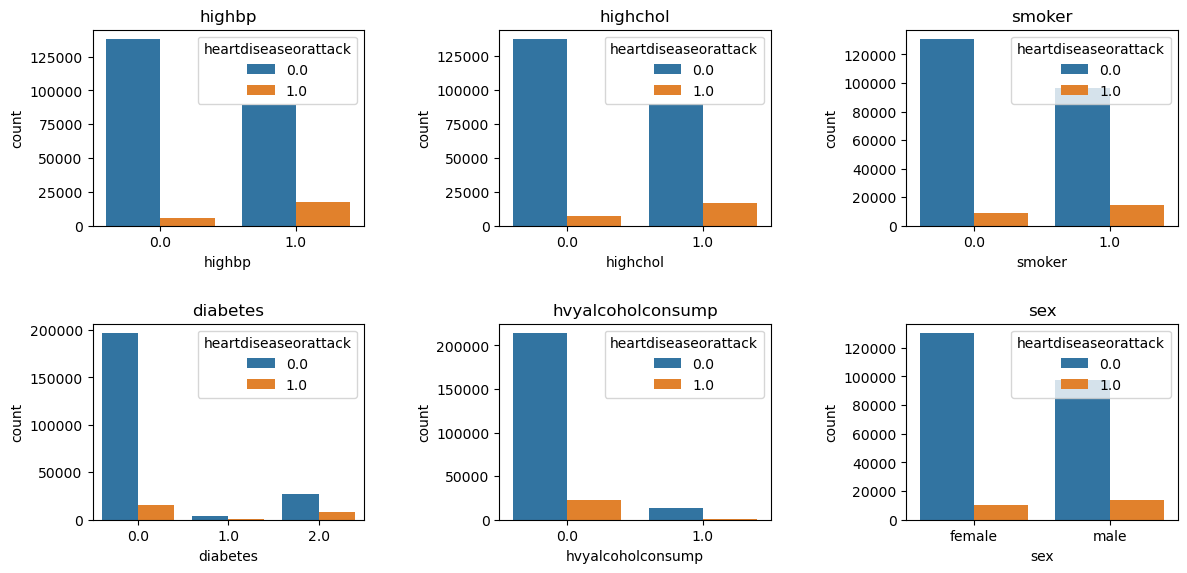

In [5]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
for i, col in enumerate(the_list):
    plt.subplot(4,3,i+1)
    sns.countplot(hue=df['heartdiseaseorattack'], x=df[col], data=df).set_title(f'{col}')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Diabetes

In [6]:
df1 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.diabetes == 0].value_counts()[0], df.heartdiseaseorattack[df.diabetes == 0].value_counts()[1])
df1 = df1.rename(index={0: 'No diabetes'})
df2 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.diabetes == 1].value_counts()[0], df.heartdiseaseorattack[df.diabetes == 1].value_counts()[1])
df2 = df2.rename(index={0: 'Pre diabetes'})
df3 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.diabetes == 2].value_counts()[0], df.heartdiseaseorattack[df.diabetes == 2].value_counts()[1])
df3 = df3.rename(index={0: 'Has diabetes'})
wrangle.combine_three_dataframes(df1, df2, df3)

,No heart problems,Heart problems,Percent heart problems
No diabetes,196862,15224,7.178220
Pre diabetes,3898,654,14.367311
Has diabetes,26773,7722,22.385853


# Alcohol consumption

In [7]:
df1 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.hvyalcoholconsump == 0].value_counts()[0], df.heartdiseaseorattack[df.hvyalcoholconsump == 0].value_counts()[1])
df1 = df1.rename(index={0: 'Alcohol free'})
df2 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.hvyalcoholconsump == 1].value_counts()[0], df.heartdiseaseorattack[df.hvyalcoholconsump == 1].value_counts()[1])
df2 = df2.rename(index={0: 'Heavy alcohol'})
wrangle.combine_two_dataframes(df1, df2)

,No heart problems,Heart problems,Percent heart problems
Alcohol free,214187,22758,9.604761
Heavy alcohol,13346,842,5.934593


# Sex

In [8]:
df1 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.hvyalcoholconsump == 0].value_counts()[0], df.heartdiseaseorattack[df.hvyalcoholconsump == 0].value_counts()[1])
df1 = df1.rename(index={0: 'Male'})
df2 = wrangle.calculate_percentage(df.heartdiseaseorattack[df.hvyalcoholconsump == 1].value_counts()[0], df.heartdiseaseorattack[df.hvyalcoholconsump == 1].value_counts()[1])
df2 = df2.rename(index={0: 'Female'})
wrangle.combine_two_dataframes(df1, df2)

,No heart problems,Heart problems,Percent heart problems
Male,214187,22758,9.604761
Female,13346,842,5.934593


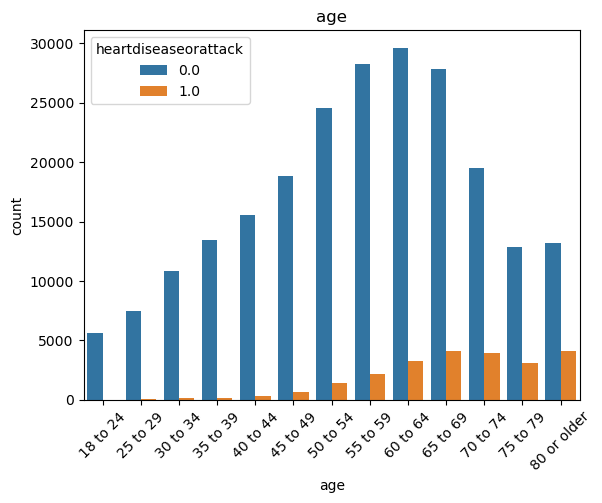

In [9]:
the_order = wrangle.the_order()
sns.countplot(hue=df['heartdiseaseorattack'], x=df['age'], data=df, order = the_order).set_title(f'{the_age}')
plt.xticks(rotation=45)
plt.show()

# Chi2 tests

> Here ran Chi2 tests on the different catagorical variables towards the target variable
<br>
<br>
> $H_0$: There is no statistical significance between my seleced features and heart disease and attack
<br>
<br>
> $H_\alpha$: There is statistical significance between my seleced features and heart disease and attack
<br>
<br>
$\alpha$: 0.05

In [10]:
chi2_df1 = wrangle.chi2_test(df, target, the_list)
chi2_df2 = wrangle.chi2_test(df, target, [the_age])
wrangle.combine_two_dataframes(chi2_df1, chi2_df2)

,feature,chi2,p,degf,expected
1,highbp,11015.047652,0.000000e+00,1,"[[130384.37387360483, 97148.62612639517], [135..."
2,highchol,8226.244926,0.000000e+00,1,"[[131095.60419777568, 96437.39580222432], [135..."
3,smoker,3311.019131,0.000000e+00,1,"[[126642.48694516452, 100890.51305483548], [13..."
4,diabetes,8193.524268,0.000000e+00,2,"[[192155.4070472618, 4124.229854300311, 31253...."
5,hvyalcoholconsump,211.350651,6.969416e-48,1,"[[214678.30466326608, 12854.695336733921], [22..."
6,sex,1889.270265,0.000000e+00,1,"[[127114.5264342002, 100418.4735657998], [1318..."
1,age,13715.206630,0.000000e+00,12,"[[5127.20051526482, 6790.66405052303, 9901.956..."


## With this we can reject the null hypothesis

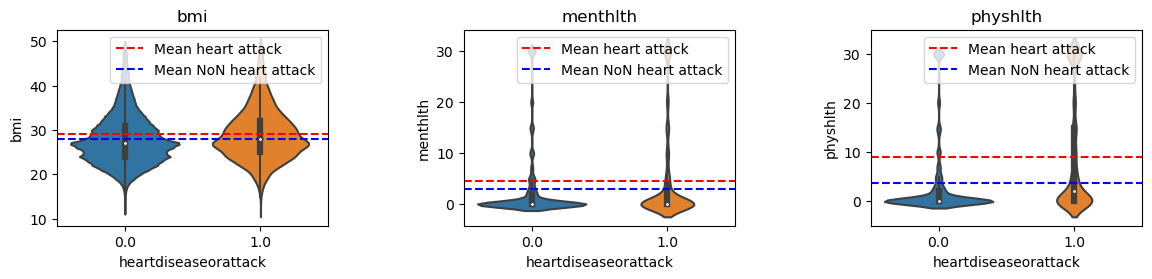

In [11]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
for i, col in enumerate(second_list):
    plt.subplot(4,3,i+1)
    sns.violinplot(x=df['heartdiseaseorattack'], y=df[col], data=df).set_title(f'{col}')
    mean_value = np.mean(df[col][df['heartdiseaseorattack'] == 1])
    mean_value_2 = np.mean(df[col][df['heartdiseaseorattack'] == 0])
    plt.axhline(mean_value, color='red', linestyle='--', label='Mean heart attack')
    plt.axhline(mean_value_2, color='blue', linestyle='--', label='Mean NoN heart attack')
    plt.legend()
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Comparison of means test
> Here ran two sample t tests on the different continuous variables towards the target variable
<br>
<br>
> $H_0$: The means of my seleced features are the same
<br>
<br>
> $H_\alpha$: The means of my seleced features are not the same
<br>
<br>
$\alpha$: 0.05

In [13]:
wrangle.comparison_of_means(df, second_list)

,Category name,P value
0,bmi,2.489162e-197
0,menthlth,5.522723e-227
0,physhlth,0.000000e+00


# with this we can reject the null hypothesis

# Exploration Summary
> - All of the features were statistically significant towards heard disease or attack

> - More people with high blood pressure had heart disease or a heart attack than those that did not
> - More people with high cholestreol had heart disease or a heart attack than those that did not
> - More people that smoked had heart disease or a heart attack than those that did not
> - People without diabeties had heart attacks 8.6% more than those that did have diabetes
> - You are 5% more likely to have a heart attack if you are a female
> - People who consumed heavy amounts of alcohol had heart disease or heart attacks 6.81% more than those that did not consume heavy amounts of alcohol

> - People in higher age brackets have a higher percentage of people who have had a heart disease or attack
> - People who have had heart attacks had more days of bad physical health
> - People who have had heart attacks had more days of bad mental health
> - People who have had heart attack and people who didn't have heart attacks have a similar bmi mean

# Multivariate exploration

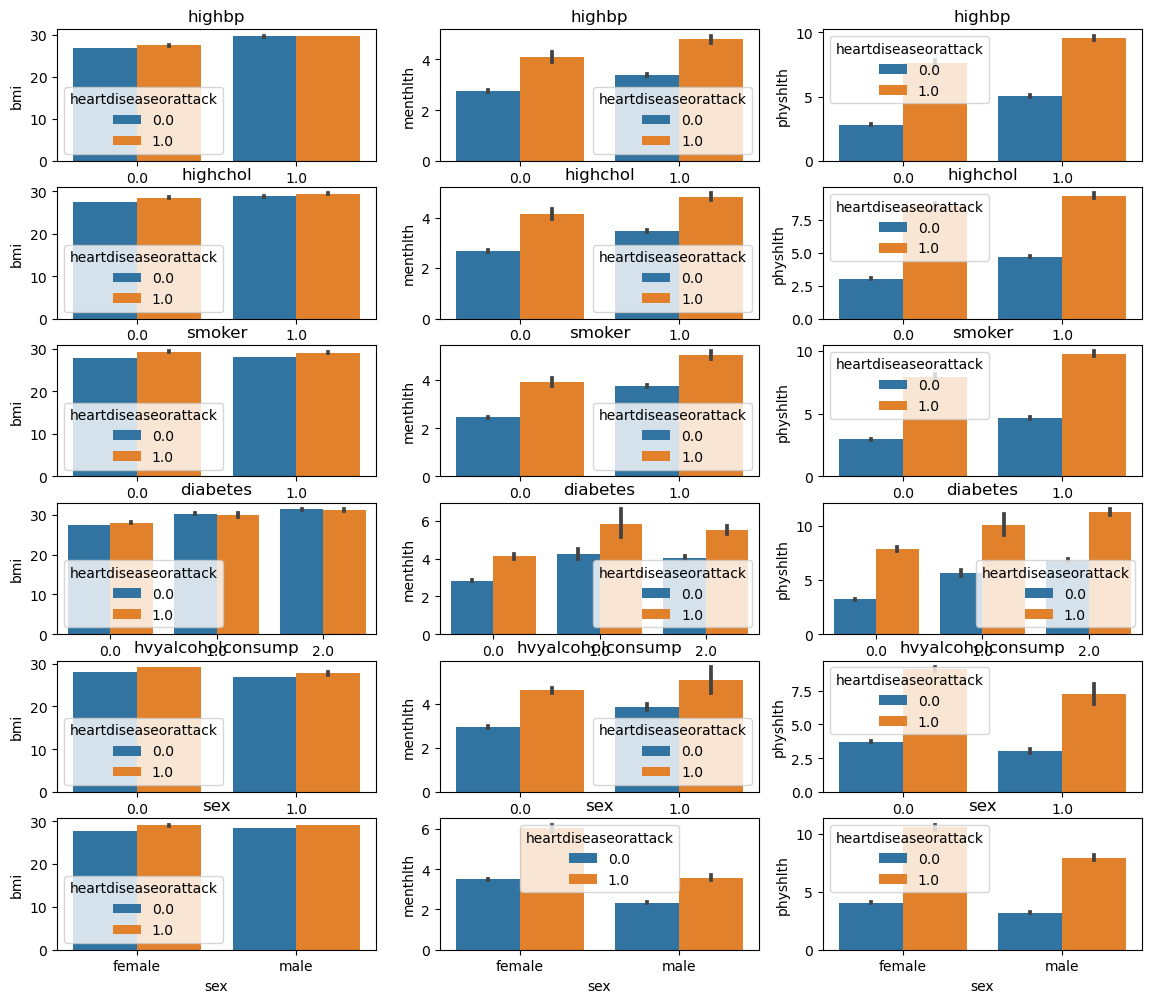

In [14]:
plt.figure(figsize=(14,14))
plt.xticks(rotation = 45)
i = 0

the_list # catagorical
second_list # continuous

for col in the_list:
    for second in second_list: 
        plt.subplot(7,3,i+1)
        sns.barplot(data=df, x=col, y=second, hue=df.heartdiseaseorattack).set_title(f'{col}')
        i +=1
    
plt.show()

# Modeling

In [21]:
knn_df = pd.read_csv('KNN.csv')
LR_df = pd.read_csv('LR.csv')
RF_df = pd.read_csv('RF.csv')
DT_df = pd.read_csv('DT.csv')
testRF = pd.read_csv('testRF.csv')

In [16]:
knn_df

,Unnamed: 0,model_train,train_predict,validate_predict,n_neighbors,difference
0,0,knn,0.905814,0.905814,neighbors,0.000000
1,20,KNeighborsClassifier,0.907548,0.904920,20,0.002628
2,18,KNeighborsClassifier,0.907640,0.904585,18,0.003055
3,19,KNeighborsClassifier,0.907462,0.903954,19,0.003508
4,16,KNeighborsClassifier,0.907653,0.904092,16,0.003561
5,17,KNeighborsClassifier,0.907534,0.903737,17,0.003797
6,14,KNeighborsClassifier,0.907975,0.904151,14,0.003824
7,15,KNeighborsClassifier,0.908099,0.903599,15,0.004500
8,12,KNeighborsClassifier,0.908336,0.903816,12,0.004520
9,10,KNeighborsClassifier,0.908973,0.903343,10,0.005630


In [17]:
LR_df

,Unnamed: 0,model_train,train_predict,validate_predict,C,difference
0,0,LogisticRegression,0.905814,0.905814,the_c,0.000000
1,1,LogisticRegression,0.905577,0.905412,0.01,0.000164
2,2,LogisticRegression,0.905320,0.905117,0.1,0.000204
3,6,LogisticRegression,0.905242,0.904998,1000,0.000243
4,4,LogisticRegression,0.905248,0.904998,10,0.000250
5,5,LogisticRegression,0.905248,0.904998,100,0.000250
6,3,LogisticRegression,0.905268,0.904979,1,0.000289


In [18]:
RF_df

,Unnamed: 0,model_train,train_predict,validate_predict,max_depth,difference
0,0,RandomForestClassifier,0.905814,0.905814,max_depth,0.000000
1,8,RandomForestClassifier,0.905826,0.905826,8,0.000000
2,1,RandomForestClassifier,0.905813,0.905826,1,0.000013
3,2,RandomForestClassifier,0.905813,0.905826,2,0.000013
4,3,RandomForestClassifier,0.905813,0.905826,3,0.000013
5,4,RandomForestClassifier,0.905813,0.905826,4,0.000013
6,5,RandomForestClassifier,0.905813,0.905826,5,0.000013
7,6,RandomForestClassifier,0.905813,0.905826,6,0.000013
8,7,RandomForestClassifier,0.905813,0.905826,7,0.000013
9,9,RandomForestClassifier,0.905977,0.905925,9,0.000053


In [19]:
DT_df

,Unnamed: 0,model_train,train_predict,validate_predict,max_depth,difference
0,0,DecisionTreeClassifier,0.640261,0.640261,max_depth,0.000000
1,1,DecisionTreeClassifier,0.905813,0.905826,1,0.000013
2,2,DecisionTreeClassifier,0.905813,0.905826,2,0.000013
3,3,DecisionTreeClassifier,0.905813,0.905826,3,0.000013
4,4,DecisionTreeClassifier,0.905813,0.905826,4,0.000013
5,5,DecisionTreeClassifier,0.905813,0.905826,5,0.000013
6,6,DecisionTreeClassifier,0.905872,0.905767,6,0.000105
7,7,DecisionTreeClassifier,0.906076,0.905176,7,0.000900
8,8,DecisionTreeClassifier,0.906529,0.905136,8,0.001393
9,9,DecisionTreeClassifier,0.907390,0.903993,9,0.003397


In [22]:
testRF

,Unnamed: 0,model_train,baseline,max_depth
0,0,RandomForestClassifier,0.905814,max_depth
1,1,RandomForestClassifier,0.906000,4


# Modeling Summary
> * Established baseline to beat at: 90.58%
> * Ran through four different classification models.
> * Random Forest at max_depth=16 performed the best with an accuracy score of 92%.
> * Ran final model on test data set. Result: 90.6%

# Conclusion
> * My top model performed beat baseline by .02 %

# Recommendations
> * I would not recommend using the model because it did not beat baseline by a significant result

# Next Steps
> * Create new columns out of existing columns to use during the modeling phase
> * Send in different combinations of columns into the different models
> * Gather more data to make the models even more accurate